In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_data=pd.read_csv('train_LZdllcl.csv')
test_data=pd.read_csv('test_2umaH9m.csv')

In [5]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
train_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [8]:
train_data.shape

(54808, 14)

In [9]:
test_data.shape

(23490, 13)

In [10]:
#checking null values
train_data.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [11]:
#checking null values for test data
test_data.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [12]:
#filling with 0
train_data['previous_year_rating'] = train_data['previous_year_rating'].fillna(0)
test_data['previous_year_rating'] = test_data['previous_year_rating'].fillna(0)

In [13]:
#filling with mode
train_data['education']=train_data['education'].fillna(train_data['education'].mode()[0])
test_data['education']=test_data['education'].fillna(test_data['education'].mode()[0])

In [14]:
train_data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [15]:
test_data.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [16]:
train_data.isnull().values.any()

False

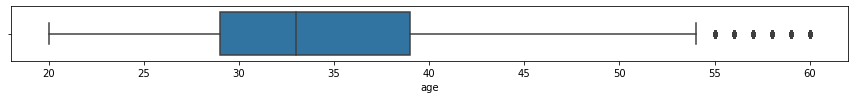

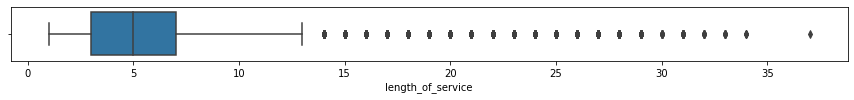

In [17]:
#Detecting Outliers
col=train_data[['age','length_of_service']]
for column in col:
        plt.figure(figsize=(15,1))
        sns.boxplot(data=col,x=column)

In [18]:
col=['age', 'length_of_service']
for x in col:
    Q1= np.percentile(train_data[x],25, interpolation='midpoint')
    Q2= np.percentile(train_data[x],50, interpolation='midpoint')
    Q3= np.percentile(train_data[x],75, interpolation='midpoint')
    IQR= Q3-Q1
    low_lim = Q1-1.5*IQR 
    upp_lim = Q3+1.5*IQR
    ind1 =train_data[x]<low_lim
    train_data.drop(train_data.loc[ind1].index,inplace= True)
    ind2 = train_data[x]>upp_lim
    train_data.drop(train_data.loc[ind2].index,inplace= True)

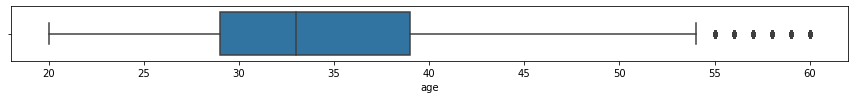

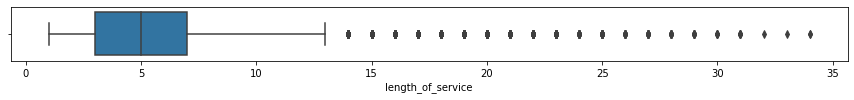

In [19]:
col=test_data[['age','length_of_service']]
for column in col:
        plt.figure(figsize=(15,1))
        sns.boxplot(data=col,x=column)

In [20]:
col=['age', 'length_of_service']
for x in col:
    Q1= np.percentile(test_data[x],25, interpolation='midpoint')
    Q2= np.percentile(test_data[x],50, interpolation='midpoint')
    Q3= np.percentile(test_data[x],75, interpolation='midpoint')
    IQR= Q3-Q1
    low_lim = Q1-1.5*IQR 
    upp_lim = Q3+1.5*IQR
    ind1 =test_data[x]<low_lim
    test_data.drop(test_data.loc[ind1].index,inplace= True)
    ind2 = test_data[x]>upp_lim
    test_data.drop(test_data.loc[ind2].index,inplace= True)

# Visualisations

<AxesSubplot:ylabel='education'>

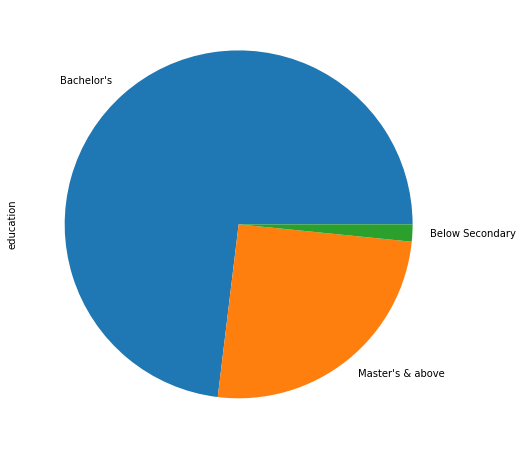

In [21]:
train_data.education.value_counts().plot(kind='pie',figsize=(10,8))

<AxesSubplot:>

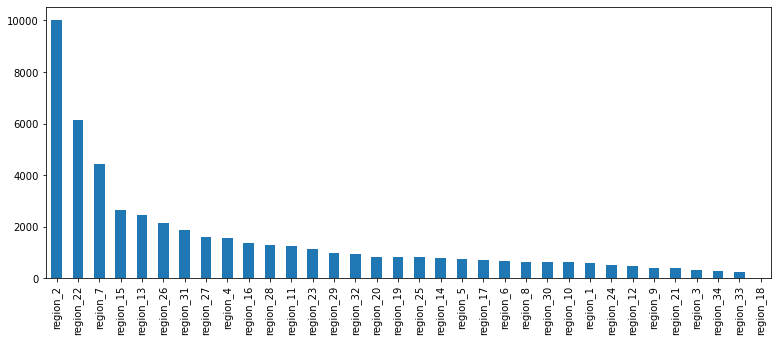

In [22]:
train_data.region.value_counts().plot(kind='bar',figsize=(13,5))

<AxesSubplot:>

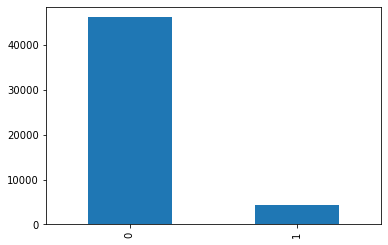

In [23]:
train_data.is_promoted.value_counts().plot(kind='bar')

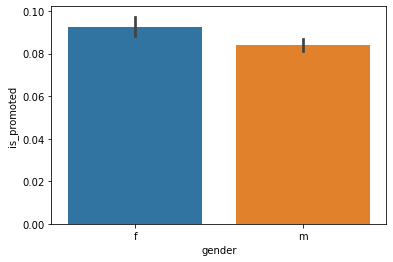

In [24]:
sns.barplot(x='gender',y='is_promoted', data=train_data)
plt.show()

<AxesSubplot:xlabel='is_promoted', ylabel='education'>

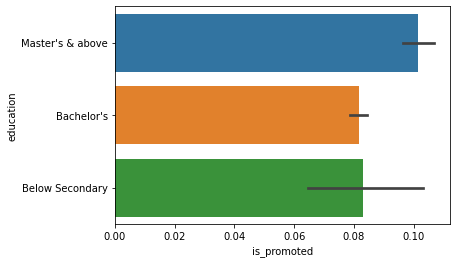

In [25]:
sns.barplot(x='is_promoted',y='education', data=train_data)

<AxesSubplot:xlabel='is_promoted', ylabel='department'>

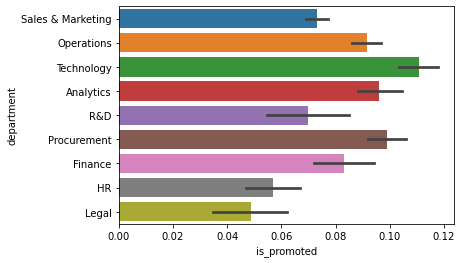

In [26]:
sns.barplot(x='is_promoted',y='department', data=train_data)

<AxesSubplot:xlabel='gender', ylabel='is_promoted'>

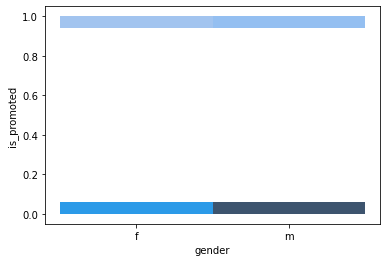

In [27]:
sns.histplot(x='gender',y='is_promoted', data=train_data,kde=True)

<AxesSubplot:>

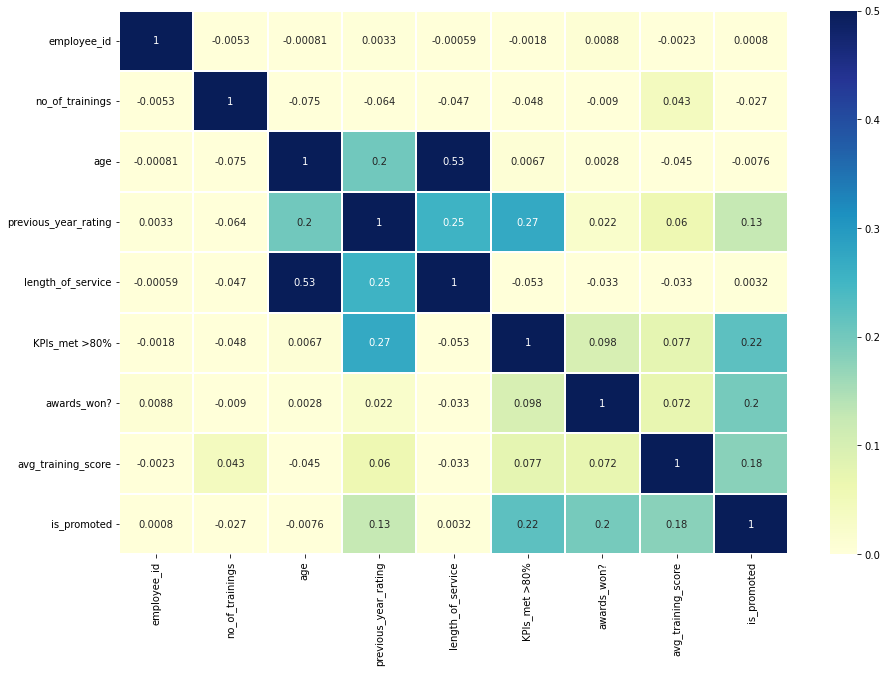

In [28]:
corr=train_data.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr,vmin=-0,vmax=0.5,annot=True,linewidth=0.2,cmap='YlGnBu')

In [29]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [30]:
#Drop
train_data=train_data.drop(['recruitment_channel','employee_id'],axis=1)
test_data=test_data.drop(['recruitment_channel','employee_id'],axis=1)

# Encoding

In [32]:
train_data['education'].value_counts()

Bachelor's          36973
Master's & above    12812
Below Secondary       805
Name: education, dtype: int64

In [33]:
train_data.isnull().values.any()

False

In [34]:
train_data['education'].replace("Master's & above",2,inplace=True)
train_data['education'].replace("Bachelor's",1,inplace=True)
train_data['education'].replace("Below Secondary",0,inplace=True)
test_data['education'].replace("Master's & above",2,inplace=True)
test_data['education'].replace("Bachelor's",1,inplace=True)
test_data['education'].replace("Below Secondary",0,inplace=True)

In [37]:
col=['department', 'region','gender']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col:
    train_data[i]=le.fit_transform(train_data[i])
    test_data[i]=le.fit_transform(test_data[i])

In [39]:
train_data

,department,region,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,1,35,5.0,8,1,0,49,0
1,4,14,1,1,1,30,5.0,4,0,0,60,0
2,7,10,1,1,1,34,3.0,7,0,0,50,0
3,7,15,1,1,2,39,1.0,10,0,0,50,0
4,8,18,1,1,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54802,7,5,1,1,2,31,1.0,2,0,0,49,0
54804,4,19,2,0,1,37,2.0,6,0,0,56,0
54805,0,0,1,1,1,27,5.0,3,1,0,79,0
54806,7,33,1,1,1,29,1.0,2,0,0,45,0


In [40]:
y=train_data['is_promoted']
x=train_data.drop(['is_promoted'],axis=1)

In [43]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# Models

In [45]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rfm=rf.fit(x_train, y_train)
pred_rf= rfm.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
f1_dt=f1_score(y_test,pred_rf)*100
f1_dt

42.886597938144334

In [49]:
acc_dt= accuracy_score(y_test,pred_rf)*100
acc_dt

93.42979127134726

In [50]:
predict=rfm.predict(test_data)

In [51]:
predict

array([0, 0, 0, ..., 0, 0, 1])

In [52]:
P=pd.DataFrame(predict)

In [53]:
P.value_counts()

0    21005
1      670
dtype: int64

,0
0,0
1,0
2,0
3,0
4,0
...,...
21670,0
21671,0
21672,0
21673,0


In [58]:
import pandas as pd
CSV = pd.DataFrame({
    "Prediction": predict
})

CSV.to_csv("sample_file.csv", index=False)

ValueError: Data must be 1-dimensional